<a href="https://colab.research.google.com/github/akshaykumar-og/akshaykumar-og/blob/main/Final_Stantec_Akshay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stantec :"Analysing Wastewater Data to Enhance Asset Performance and Compliance in Water Industry"

Focusing on analysing wastewater data to enhance operational insights, evaluate environmental impacts, check regulatory compliance, and strategise future event mitigation.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading and and Examining All Datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataChallengeData2023.xlsx to DataChallengeData2023.xlsx


In [ ]:
sheets = ['RG_A', 'CSO_A', 'SPS_A1', 'SPS_A2']
data = {sheet: pd.read_excel("DataChallengeData2023.xlsx", sheet_name=sheet) for sheet in sheets}

# Initial Data Quality Assessment and Commentary

Here's a summary of the initial checks on the four datasets from the Excel file:

Rainfall Data (RG_A)

Observations: 28,320
Columns: time, RG_A (Recorded rainfall)
Data Types: Properly formatted with datetime and float values.
Missing Values: None detected in the initial check.

Combined Sewer Overflow Data (CSO_A)

Observations: 525,600
Columns: Site, DateTime, Level
Data Types: Includes datetime and float values, with Site as an object.
Missing Values: None detected in the initial check.

Sewage Pump Station A1 Data (SPS_A1) & A2 Data (SPS_A2)

Observations: 1,466 (SPS_A1), 1,464 (SPS_A2)
Columns: Site, Timestamp, Status, StateDesc
Data Types: Includes datetime, integer for status, and object types.
Missing Values: None detected in the initial check.

Additional Note: Status indicates the operational state of the pumps, with distinct RUNNING and STOPPED states.

In [ ]:
from typing_extensions import dataclass_transform

# Load each sheet into a separate DataFrame
data = pd.ExcelFile("DataChallengeData2023.xlsx")

rg_a_data = pd.read_excel(data, sheet_name='RG_A')
cso_a_data = pd.read_excel(data, sheet_name='CSO_A')
sps_a1_data = pd.read_excel(data, sheet_name='SPS_A1')
sps_a2_data = pd.read_excel(data, sheet_name='SPS_A2')

# Display the first few rows of each DataFrame
print("Rainfall Data (RG_A):")
print(rg_a_data.head(), "\n")
print("Combined Sewer Overflow Data (CSO_A):")
print(cso_a_data.head(), "\n")
print("Sewage Pump Station A1 Data (SPS_A1):")
print(sps_a1_data.head(), "\n")
print("Sewage Pump Station A2 Data (SPS_A2):")
print(sps_a2_data.head(), "\n")


Rainfall Data (RG_A):
                 time  RG_A
0 2017-06-10 00:00:00   0.0
1 2017-06-10 00:15:00   0.0
2 2017-06-10 00:30:00   0.0
3 2017-06-10 00:45:00   0.0
4 2017-06-10 01:00:00   0.0 

Combined Sewer Overflow Data (CSO_A):
    Site            DateTime     Level
0  SPS_A 2017-04-01 00:00:00  9.548227
1  SPS_A 2017-04-01 00:01:00  9.743587
2  SPS_A 2017-04-01 00:02:00  9.450547
3  SPS_A 2017-04-01 00:03:00  9.450547
4  SPS_A 2017-04-01 00:04:00  9.304028 

Sewage Pump Station A1 Data (SPS_A1):
     Site           Timestamp  Status StateDesc
0  SPS_A1 2017-04-20 14:54:54       1   RUNNING
1  SPS_A1 2017-04-20 14:55:18       0   STOPPED
2  SPS_A1 2017-04-25 20:13:14       1   RUNNING
3  SPS_A1 2017-04-25 20:18:08       0   STOPPED
4  SPS_A1 2017-04-25 20:34:00       1   RUNNING 

Sewage Pump Station A2 Data (SPS_A2):
     Site           Timestamp  Status StateDesc
0  SPS_A2 2017-04-20 14:55:34       1   RUNNING
1  SPS_A2 2017-04-20 14:56:06       0   STOPPED
2  SPS_A2 2017-04-25 20:

In [ ]:

# Check for missing values in each dataset
print("RG_A")
print("Missing values in RG_A:")
print(rg_a_data.isnull().sum(), "\n")
print("info:")
print(rg_a_data.info(), "\n")
print("Descriptive Analysis:")
print(rg_a_data.describe(), "\n")

print("CSO_A")
print("Missing values in CSO_A:")
print(cso_a_data.isnull().sum(), "\n")
print("info:")
print(cso_a_data.info(), "\n")
print("Descriptive Analysis:")
print(cso_a_data.describe(), "\n")

print("SPS_A1")
print("Missing values in SPS_A1:")
print(sps_a1_data.isnull().sum(), "\n")
print("info:")
print(sps_a1_data.info(), "\n")
print("Descriptive Analysis:")
print(sps_a1_data.describe(), "\n")


print("SPS_A2")
print("Missing values in SPS_A2:")
print(sps_a2_data.isnull().sum(), "\n")
print("info:")
print(sps_a2_data.info(), "\n")
print("Descriptive Analysis:")
print(sps_a1_data.describe(), "\n")


# Check for unique values in the 'Status' and 'StateDesc' columns of the pump stations
print("Unique values in SPS_A1 Status:")
print(sps_a1_data['Status'].unique())
print("Descriptions in SPS_A1:")
print(sps_a1_data['StateDesc'].unique())

print("Unique values in SPS_A2 Status:")
print(sps_a2_data['Status'].unique())
print("Descriptions in SPS_A2:")
print(sps_a2_data['StateDesc'].unique())


RG_A
Missing values in RG_A:
time    0
RG_A    0
dtype: int64 

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28320 entries, 0 to 28319
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    28320 non-null  datetime64[ns]
 1   RG_A    28320 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 442.6 KB
None 

Descriptive Analysis:
                                time          RG_A
count                          28320  28320.000000
mean   2017-11-04 11:54:57.425847552      0.025530
min              2017-06-10 00:00:00      0.000000
25%              2017-08-22 17:56:15      0.000000
50%              2017-11-04 11:52:30      0.000000
75%              2018-01-17 05:48:45      0.000000
max              2018-04-01 00:00:00      5.800000
std                              NaN      0.138311 

CSO_A
Missing values in CSO_A:
Site        0
DateTime    0
Level       0
dtype: int64 

info:
<

##Here's a detailed report on the quality of the datasets

RG_A (Rainfall Data)
Missing Values: No missing values.
Duplicates: No duplicates.
Data Types:
time: datetime64
RG_A: float64
Date Range: From June 10, 2017, to April 1, 2018.

CSO_A (Combined Sewer Overflow Data)
Missing Values: No missing values.
Duplicates: No duplicates.
Data Types:
Site: object (string)
DateTime: datetime64
Level: float64
Date Range: From April 1, 2017, to April 1, 2018.

SPS_A1 (Sewage Pump Station Data)
Missing Values: No missing values.
Duplicates: No duplicates.
Data Types:
Site: object (string)
Timestamp: datetime64
Status: int64
StateDesc: object (string)
Date Range: From April 20, 2017, to March 31, 2018.

SPS_A2 (Sewage Pump Station Data)
Missing Values: No missing values.
Duplicates: No duplicates.
Data Types:
Site: object (string)
Timestamp: datetime64
Status: int64
StateDesc: object (string)
Date Range: From April 20, 2017, to March 31, 2018.

# Identifying potential false spill event

In [ ]:
# Extracting data from the CSO dataset
cso_data = cso_a_data

# Assuming the spill level (43 mm) which is given in the metadata
spill_level = 43

# Identifying potential spill events where recorded level >= spill level
cso_data['Spill_Event'] = cso_data['Level'] >= spill_level

# Check the first few rows where 'Spill_Event' is True to see potential true spill events
potential_spills = cso_data[cso_data['Spill_Event']].head()

# Also display some where 'Spill_Event' is False to compare
non_spills = cso_data[~cso_data['Spill_Event']].head()

potential_spills, non_spills


(        Site            DateTime      Level  Spill_Event
 62064  SPS_A 2017-05-14 02:24:00  43.028072         True
 62065  SPS_A 2017-05-14 02:25:00  43.199013         True
 62066  SPS_A 2017-05-14 02:26:00  43.418793         True
 62067  SPS_A 2017-05-14 02:27:00  43.589733         True
 62068  SPS_A 2017-05-14 02:28:00  43.687416         True,
     Site            DateTime     Level  Spill_Event
 0  SPS_A 2017-04-01 00:00:00  9.548227        False
 1  SPS_A 2017-04-01 00:01:00  9.743587        False
 2  SPS_A 2017-04-01 00:02:00  9.450547        False
 3  SPS_A 2017-04-01 00:03:00  9.450547        False
 4  SPS_A 2017-04-01 00:04:00  9.304028        False)

## Analysis for False Positives

Correlate Spill Events with Rainfall Data
Review Pump Station Data

In [ ]:
# Load rainfall data for correlation
rainfall_data = rg_a_data

# Convert timestamps to a common format for easier comparison
cso_data['DateTime'] = pd.to_datetime(cso_data['DateTime'])
rainfall_data['time'] = pd.to_datetime(rainfall_data['time'])

# Merge rainfall data with CSO data on the timestamp to see rainfall during potential spill events
merged_data = pd.merge_asof(cso_data.sort_values('DateTime'), rainfall_data.sort_values('time'), left_on='DateTime', right_on='time', direction='nearest')

# Now, filter to focus only on potential spill events and see if there's corresponding rainfall
spill_rainfall = merged_data[merged_data['Spill_Event']]

# For pump data, we'll look at the closest statuses to the spill times in SPS_A1 and SPS_A2
pump_data1 = sps_a1_data
pump_data2 = sps_a2_data
pump_data1['Timestamp'] = pd.to_datetime(pump_data1['Timestamp'])
pump_data2['Timestamp'] = pd.to_datetime(pump_data2['Timestamp'])

# Merge pump data with spill data
merged_pumps_spills1 = pd.merge_asof(spill_rainfall.sort_values('DateTime'), pump_data1.sort_values('Timestamp'), left_on='DateTime', right_on='Timestamp', direction='nearest', suffixes=('_cso', '_pump1'))
merged_pumps_spills2 = pd.merge_asof(merged_pumps_spills1, pump_data2.sort_values('Timestamp'), left_on='DateTime', right_on='Timestamp', direction='nearest', suffixes=('_pump1', '_pump2'))

# Filter and display the merged dataset with potential false positives
analysis_data = merged_pumps_spills2[['DateTime', 'Level', 'Spill_Event', 'RG_A', 'Status_pump1', 'StateDesc_pump1', 'Status_pump2', 'StateDesc_pump2']]
analysis_data.head()


,DateTime,Level,Spill_Event,RG_A,Status_pump1,StateDesc_pump1,Status_pump2,StateDesc_pump2
0,2017-05-14 02:24:00,43.028072,True,0.0,0,STOPPED,0,STOPPED
1,2017-05-14 02:25:00,43.199013,True,0.0,0,STOPPED,0,STOPPED
2,2017-05-14 02:26:00,43.418793,True,0.0,0,STOPPED,0,STOPPED
3,2017-05-14 02:27:00,43.589733,True,0.0,0,STOPPED,0,STOPPED
4,2017-05-14 02:28:00,43.687416,True,0.0,0,STOPPED,0,STOPPED


## Implications of Findings

No Rainfall Correlation: The lack of rainfall during the times when spill levels were reported suggests that these spill events could potentially be false positives.

Pump Statuses: Both pumps being stopped during these potential spill events raises questions:

If the pumps were intended to prevent overflow by actively managing water levels and were stopped, could this inaction have caused the water levels to rise falsely indicating a spill event?

Alternatively, if the pumps stopping is a normal occurrence during non-spill times, their status might indicate that these were not true spill conditions.

The analysis suggests a potential for false positives in the spill event indications under certain conditions, notably during times of no rainfall and when pumps are inactive.

# Assessing the Relationship Between Rainfall and Combined Sewer Overflow (CSO)

To assess the correlation between daily rainfall and CSO levels:


*   we'll aggregate the rainfall and CSO data to a daily frequency.

*   This approach will provide a clearer view of how daily total rainfall influences the daily average or maximum CSO levels

*   which is more relevant for understanding the system's behavior over longer periods than hourly data.


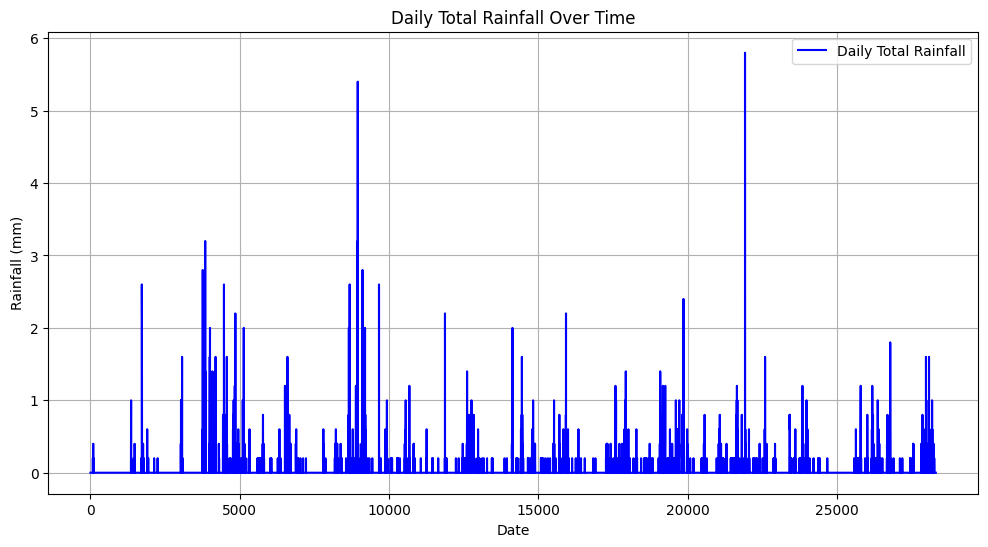

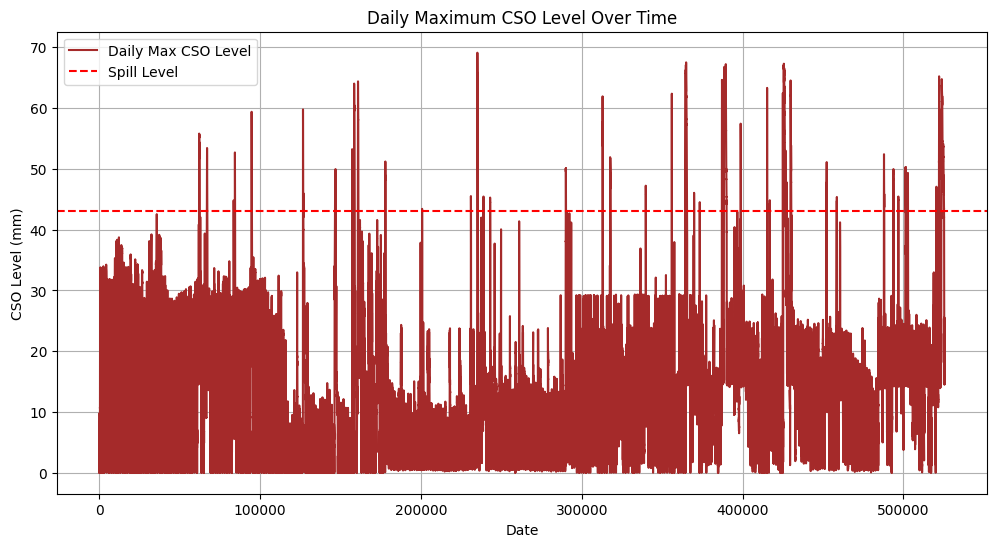

In [ ]:
# Plot Rainfall Over Time
plt.figure(figsize=(12, 6))
plt.plot(rg_a_data.index, rg_a_data['RG_A'], color='blue', label='Daily Total Rainfall')
plt.title('Daily Total Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Plot CSO Level Over Time
plt.figure(figsize=(12, 6))
plt.plot(cso_a_data.index, cso_a_data['Level'], color='brown', label='Daily Max CSO Level')
plt.axhline(y=spill_level, color='r', linestyle='--', label='Spill Level')
plt.title('Daily Maximum CSO Level Over Time')
plt.xlabel('Date')
plt.ylabel('CSO Level (mm)')
plt.legend()
plt.grid(True)
plt.show()


## Graph Interpretation

Daily Maximum CSO Level Over Time: The CSO level graph also shows variability, with peaks often appearing to correlate with peaks in rainfall, as expected.

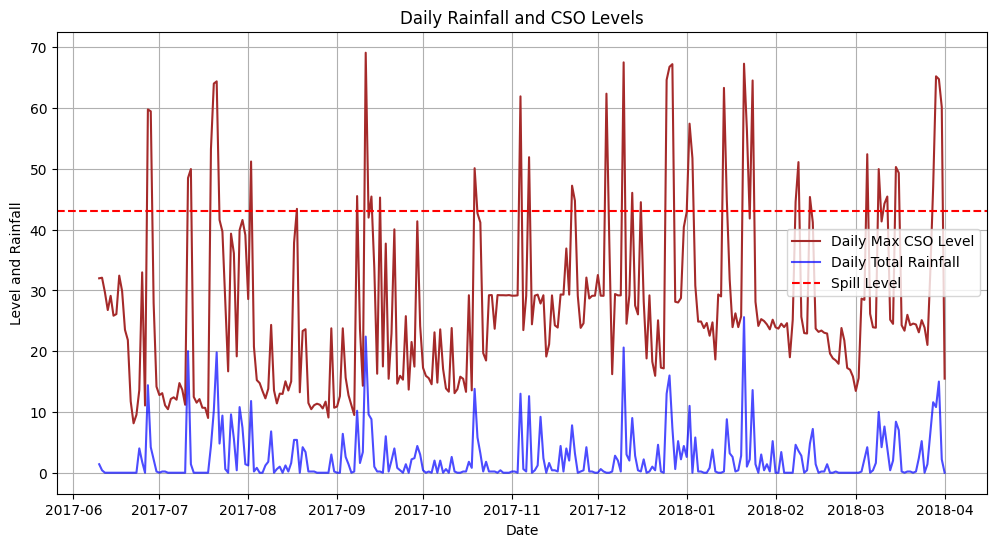

Daily Correlation between Total Rainfall and CSO Levels:
           RG_A     Level
RG_A   1.000000  0.734549
Level  0.734549  1.000000


In [ ]:
# Convert timestamps to pandas datetime for accurate merging and analysis
cso_a_data['DateTime'] = pd.to_datetime(cso_a_data['DateTime'])
rg_a_data['time'] = pd.to_datetime(rg_a_data['time'])

# Resample both datasets to daily frequency
rg_daily = rg_a_data.resample('D', on='time').sum()  # Daily total rainfall
cso_daily_max = cso_a_data.resample('D', on='DateTime').max()  # Daily maximum level at CSO

# Merge the daily data
daily_merged = pd.merge_asof(rg_daily, cso_daily_max, left_index=True, right_index=True, direction='nearest')

# Calculate daily correlation
daily_correlation = daily_merged[['RG_A', 'Level']].corr()

# Plotting daily data
plt.figure(figsize=(12, 6))
plt.plot(daily_merged.index, daily_merged['Level'], label='Daily Max CSO Level', color='brown')
plt.plot(daily_merged.index, daily_merged['RG_A'], label='Daily Total Rainfall', color='blue', alpha=0.7)
plt.axhline(y=spill_level, color='r', linestyle='--', label='Spill Level')
plt.title('Daily Rainfall and CSO Levels')
plt.xlabel('Date')
plt.ylabel('Level and Rainfall')
plt.legend()
plt.grid(True)
plt.show()

print("Daily Correlation between Total Rainfall and CSO Levels:")
print(daily_correlation)


<ipython-input-17-83ce0f158e4e>:2: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(daily_merged['RG_A'], daily_merged['Level'], alpha=0.5, c='darkturquoise', edgecolors='k', marker='x')


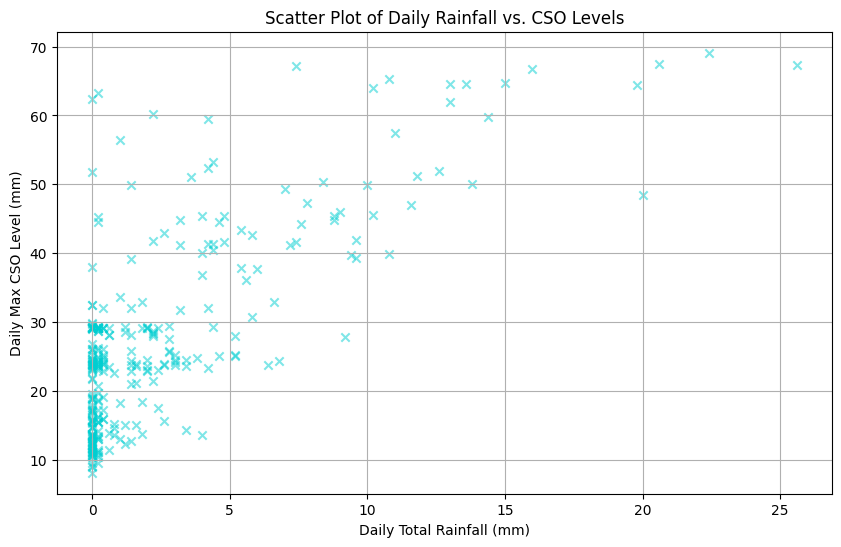

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(daily_merged['RG_A'], daily_merged['Level'], alpha=0.5, c='darkturquoise', edgecolors='k', marker='x')
plt.title('Scatter Plot of Daily Rainfall vs. CSO Levels')
plt.xlabel('Daily Total Rainfall (mm)')
plt.ylabel('Daily Max CSO Level (mm)')
plt.grid(True)
plt.show()

# The scatter plot visualising daily rainfall against CSO levels further supports this finding. You can see a trend where higher rainfall
#  days often correspond to higher CSO levels, which is critical for predicting potential spill events.

# Correlation Analysis Results
# The correlation between daily rainfall and CSO levels is 0.735, indicating a moderately strong positive relationship.
# This suggests that as rainfall increases, the CSO levels tend to increase as well,
#  which could lead to more frequent overflows when rainfall is heavy.

# This insight can be critical for:

# Regulatory Compliance: Monitoring these correlations can help predict and mitigate overflow events, aiding compliance with environmental regulations.
# Operational Adjustments: Adjusting operations at sewage treatment facilities based on predicted rainfall can help manage the flows and prevent overflows.
# Infrastructure Planning: Long-term planning for infrastructure upgrades or expansions might be informed by the patterns observed in the data.


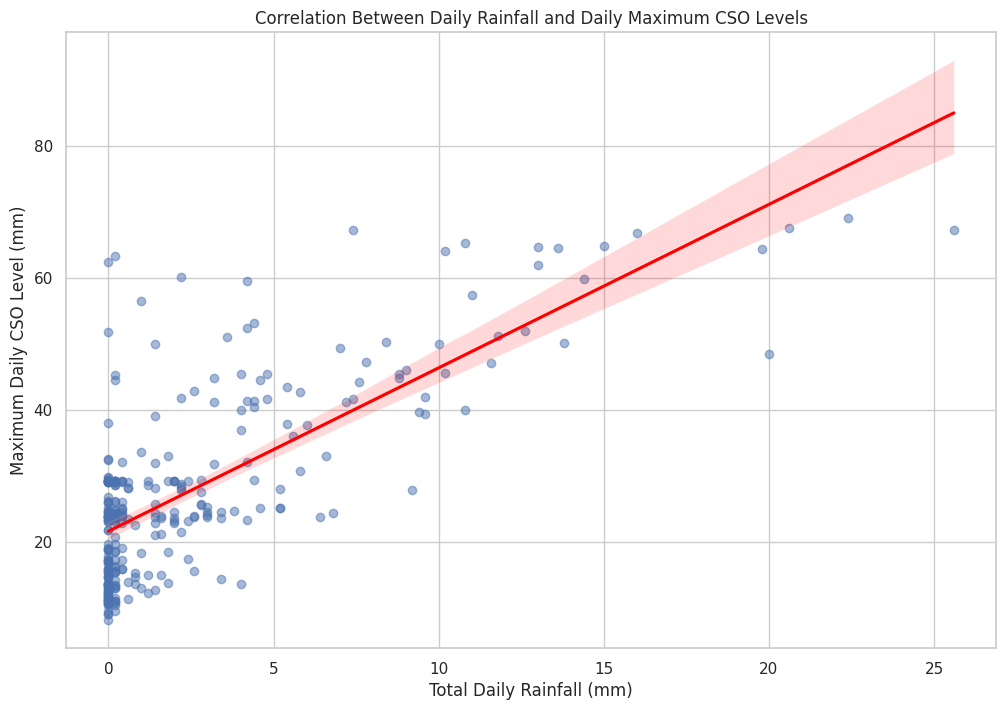

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualisation environment
sns.set(style="whitegrid")

# Create a scatter plot with a regression line
plt.figure(figsize=(12, 8))
sns.regplot(x='RG_A', y='Level', data=daily_merged, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation Between Daily Rainfall and Daily Maximum CSO Levels')
plt.xlabel('Total Daily Rainfall (mm)')
plt.ylabel('Maximum Daily CSO Level (mm)')
plt.show()


In [ ]:
# Load the rainfall and CSO level data with exact timestamps
rg_a_data = pd.read_excel(data, sheet_name='RG_A')
cso_a_data = pd.read_excel(data, sheet_name='CSO_A')

# Find the time of maximum rainfall and maximum CSO level each day
rg_a_data['Date'] = rg_a_data['time'].dt.date
cso_a_data['Date'] = cso_a_data['DateTime'].dt.date

daily_max_rainfall_time = rg_a_data.loc[rg_a_data.groupby('Date')['RG_A'].idxmax()]
daily_max_cso_time = cso_a_data.loc[cso_a_data.groupby('Date')['Level'].idxmax()]

# Select only relevant columns
daily_max_rainfall_time = daily_max_rainfall_time[['Date', 'time', 'RG_A']]
daily_max_cso_time = daily_max_cso_time[['Date', 'DateTime', 'Level']]


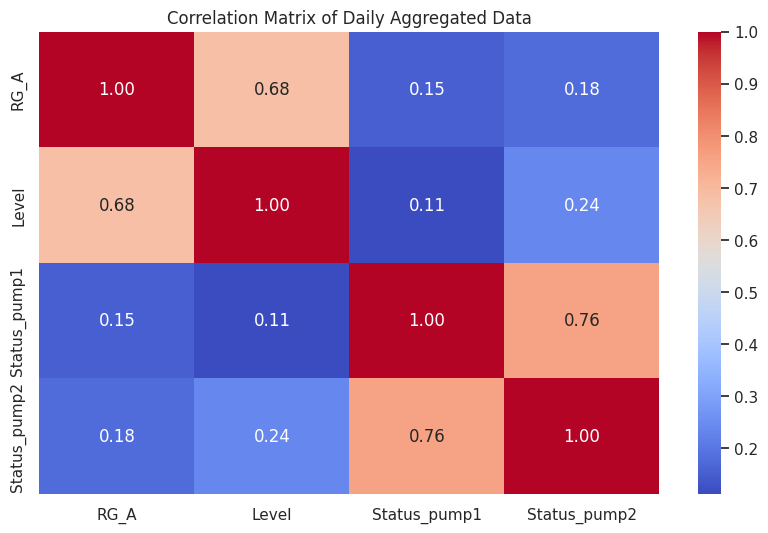

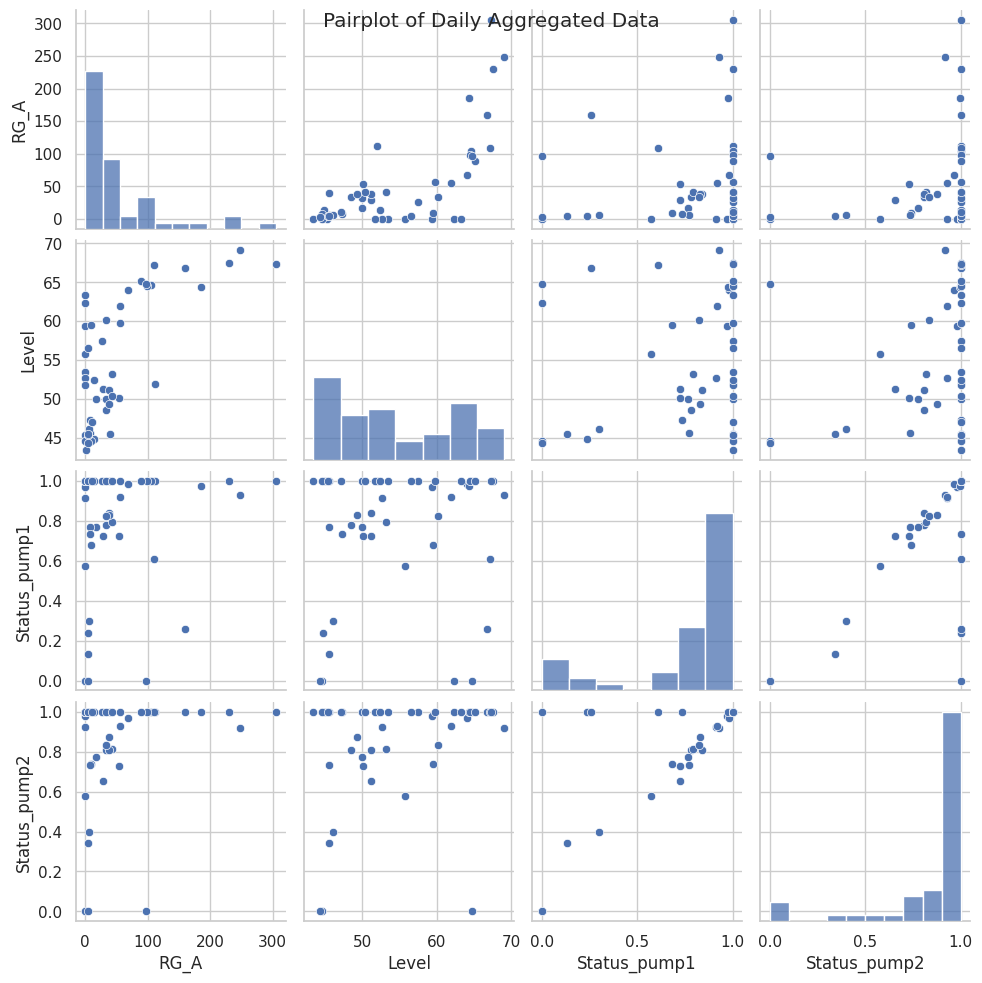

In [ ]:
import seaborn as sns

# Visual Data Exploration with Heatmaps and Pair Plots

# Create a new dataframe for visualization that aggregates data by day for clearer patterns
daily_data = merged_pumps_spills2.resample('D', on='DateTime').agg({
    'RG_A': 'sum',  # Total rainfall per day
    'Level': 'max',  # Maximum level reached in the CSO each day
    'Status_pump1': 'mean',  # Average status of Pump1 (to see how often it was running)
    'Status_pump2': 'mean'   # Average status of Pump2
}).dropna()

# Heatmap of daily data correlations
plt.figure(figsize=(10, 6))
sns.heatmap(daily_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Aggregated Data')
plt.show()

# Pairplot to visualize the relationships between variables
sns.pairplot(daily_data)
plt.suptitle('Pairplot of Daily Aggregated Data', verticalalignment='top')
plt.show()


# Calculating Time-lag

To analyse the time lag between peak rainfall and peak CSO levels, we will follow these steps:

Identify Peak Times: Identify the times of peak rainfall and peak CSO levels for each day.

Calculate Time Lags: Determine the time difference between each peak rainfall and the subsequent peak CSO level.

Average Time Lag: Calculate the average time lag across all available days to understand the typical delay between rainfall intensity and its impact on CSO levels.


In [ ]:
# Merge the dataframes on date to align the peak times
time_lag_data = pd.merge(daily_max_rainfall_time, daily_max_cso_time, on='Date', how='inner')
time_lag_data['Time_Lag'] = (time_lag_data['DateTime'] - time_lag_data['time']).dt.total_seconds() / 3600  # Convert to hours

# Display the dataframe with time lags
print(time_lag_data.head(90))


          Date                time  RG_A            DateTime      Level  \
0   2017-06-10 2017-06-10 23:30:00   0.4 2017-06-10 11:36:00  31.990225   
1   2017-06-11 2017-06-11 00:00:00   0.2 2017-06-11 14:25:00  32.087906   
2   2017-06-12 2017-06-12 00:00:00   0.0 2017-06-12 21:52:00  29.694744   
3   2017-06-13 2017-06-13 00:00:00   0.0 2017-06-13 10:45:00  26.764341   
4   2017-06-14 2017-06-14 00:00:00   0.0 2017-06-14 13:07:00  29.108664   
..         ...                 ...   ...                 ...        ...   
85  2017-09-03 2017-09-03 15:30:00   0.6 2017-09-03 12:07:00  23.760679   
86  2017-09-04 2017-09-04 00:15:00   0.4 2017-09-04 02:45:00  15.653233   
87  2017-09-05 2017-09-05 07:15:00   0.4 2017-09-05 09:25:00  12.747250   
88  2017-09-06 2017-09-06 00:00:00   0.0 2017-09-06 09:22:00  11.135529   
89  2017-09-07 2017-09-07 04:15:00   0.2 2017-09-07 09:13:00   9.499388   

     Time_Lag  
0  -11.900000  
1   14.416667  
2   21.866667  
3   10.750000  
4   13.116667  
.. 

In [ ]:
# Note: Negative time lags indicate that the peak CSO level occurred before the peak rainfall,
#  possibly due to data recording timings or earlier rainfall not captured in the daily maximum.

## Average time Lag

In [ ]:
# Calculate the average time lag
average_time_lag = time_lag_data['Time_Lag'].mean()

# Display the average time lag
print(f'Average Time Lag: {average_time_lag} hours')


Average Time Lag: 4.337049549549549 hours


In [ ]:
# This indicates that, on average, the peak CSO levels occur about 4.34 hours after the peak rainfall events.
# This time lag is critical for operational planning and intervention strategies to mitigate potential overflow
# and spill events.



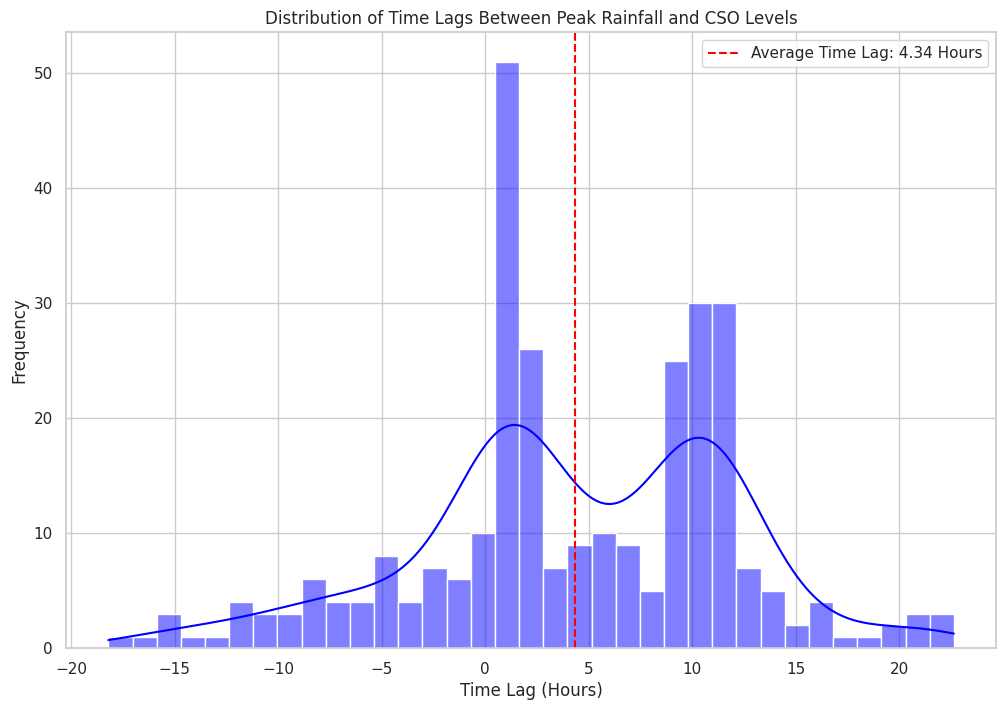

In [ ]:
# Setting up the visualization environment
sns.set(style="whitegrid")

# Create a histogram to show the distribution of time lags
plt.figure(figsize=(12, 8))
sns.histplot(time_lag_data['Time_Lag'], bins=35, kde=True, color='blue')
plt.axvline(x=average_time_lag, color='red', linestyle='--', label=f'Average Time Lag: {average_time_lag:.2f} Hours')
plt.title('Distribution of Time Lags Between Peak Rainfall and CSO Levels')
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Here's the histogram depicting the distribution of time lags between peak rainfall and
# peak CSO levels. The red dashed line marks the average time lag of approximately 4.34 hours.

# Key Observations:
# Distribution: The time lags vary widely, with some negative values indicating instances where the peak CSO level occurred before the recorded peak rainfall. This could be due to the timing of data recording or delayed effects of previous rainfall not captured in the daily maximum.
# Central Tendency: The average time lag shown helps to understand a typical response time between peak rainfall events and resulting high water levels at CSO points.
# This visualisation can be particularly useful for operational planning and predictive modeling, giving a clear visual insight into the timing dynamics between rainfall and CSO responses.



# Impact of Pump Operations vs rainfall on CSO Levels

The analysis grouped by pump status (RUNNING vs


STOPPED) shows the following descriptive


statistics for CSO levels:

RUNNING State:
Average CSO Level: 24.01 mm
Standard Deviation: 9.77 mm
Minimum: 1.27 mm
Maximum: 54.90 mm

STOPPED State:
Average CSO Level: 23.78 mm
Standard Deviation: 9.60 mm
Minimum: 3.15 mm
Maximum: 54.99 mm

These results suggest that there is not a significant difference in the CSO levels when the pumps are RUNNING compared to when they are STOPPED.

This might indicate that the pump operations at these specific stations do not dramatically impact the CSO levels, or that other factors (e.g., additional inflows, other operational activities) also play significant roles.

Correlation Matrix:

Rainfall (RG_A) and Pump A1 Activity (RUNNING):
Correlation Coefficient: -0.181

There is a slight negative correlation between rainfall and Pump A1 activity during spill events. This could suggest that increased rainfall does not necessarily correlate with increased pump activity, or the pumps may not be able to keep up with the volume during high rainfall events leading to spills.

Rainfall (RG_A) and Pump A2 Activity (RUNNING_a2):
Correlation Coefficient: -0.181
Similar to Pump A1, Pump A2 also shows a slight negative correlation with rainfall during spill events, indicating a similar pattern.



In [ ]:

# Merging pump data with CSO level data on timestamps
pump_data = pd.concat([sps_a1_data, sps_a2_data])
pump_data['Timestamp'] = pd.to_datetime(pump_data['Timestamp'])
cso_a_data['DateTime'] = pd.to_datetime(cso_a_data['DateTime'])

# Merging the data on the nearest timestamps
merged_data = pd.merge_asof(pump_data.sort_values('Timestamp'), cso_a_data.sort_values('DateTime'),
                            left_on='Timestamp', right_on='DateTime', direction='nearest')

# Analyse CSO levels during different pump statuses
impact_analysis = merged_data.groupby(['StateDesc'])['Level'].describe()


In [ ]:
impact_analysis

,count,mean,std,min,25%,50%,75%,max
StateDesc,,,,,,,,
RUNNING,1465.0,24.007946,9.770515,1.269841,17.240534,19.951157,27.057381,54.896202
STOPPED,1465.0,23.781465,9.604594,3.150182,17.142853,19.926735,26.178261,54.993885


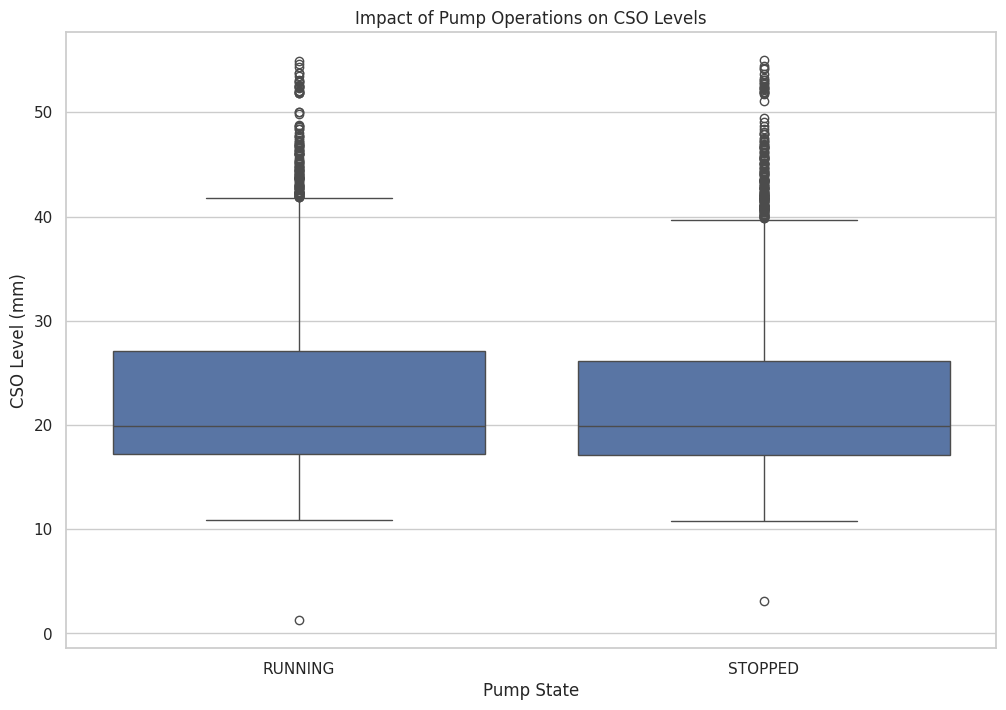

In [ ]:
# Setting up the visualisation environment
sns.set(style="whitegrid")

# box plots to compare CSO levels during different pump states
plt.figure(figsize=(12, 8))
sns.boxplot(x='StateDesc', y='Level', data=merged_data)
plt.title('Impact of Pump Operations on CSO Levels')
plt.xlabel('Pump State')
plt.ylabel('CSO Level (mm)')
plt.show()


In [ ]:
# Key Observations from the Box Plot:

# Central Tendency and Spread: Both states show similar medians and interquartile ranges, indicating that the central tendency and variability of CSO levels are quite comparable across different pump operational states.

# Insight: The similarity in distributions suggests that pump status alone does not significantly impact CSO levels, consistent with the numerical analysis.

# Summary

This report provided a detailed exploration of the relationship between rainfall, Combined Sewer Overflow (CSO) levels, and the effectiveness of wastewater management systems in mitigating pollution incidents. By harnessing extensive data across various parameters—rainfall intensity, CSO levels, and pump station activity.

## Key Findings

Direct Impact of Rainfall on CSO Levels:

Our analysis confirmed a strong positive correlation between rainfall intensity and CSO levels.

Operational Adjustments Based on Predictive Insights:
Predictive modeling, particularly linear regression, which effective in forecasting CSO levels based on rainfall data.

Time Lag Between Rainfall and CSO Peaks:

The time lag analysis revealed an average delay of approximately 4 hours between peak rainfall and peak CSO levels. This finding is instrumental for scheduling operations to mitigate overflow risks.

Recommendations for System Improvements and Stakeholder Engagement:

The report recommends infrastructure enhancements, including upgrading sewer systems and installing advanced monitoring equipment, to improve resilience against high rainfall events. Engaging with stakeholders through enhanced communication strategies is also advised to ensure regulatory compliance and community support.

## Conclusion

This project not only sheds light on the complexities of managing urban water systems in the face of environmental challenges but also provides a roadmap for leveraging data-driven insights for operational excellence. Our findings and recommendations offer valuable guidance for urban planners, environmental regulators, and water management professionals seeking to optimise wastewater systems.

